# Show spread of destination

In [4]:
%load_ext autoreload
%autoreload 2

import os, sys
from helpers.highlevel_sceneloader import HighLevelSceneLoader
from predictors.dataset_creator import TFDataSet
from helpers.accuracy_functions import return_batch_accuracy, return_ds_accuracy
import tensorflow as tf
from predictors.dl_trainer import DLTrainer 
import matplotlib.pyplot as plt
import pickle
import numpy as np
from helpers.graph import Graph

In [2]:
ROOT = os.getcwd()

rel_p_img_b = 'helpers/analysed_vars_storage/img_bounds.xml'
rel_p_dests = 'helpers/analysed_vars_storage/destination_locations.xml'
p_img_bounds = os.path.join(ROOT, rel_p_img_b)
p_dest_locs = os.path.join(ROOT, rel_p_dests)

#TODO: older version of OpenTraj needed: "git checkout d249ba6951dd0f54b532fbe2ca6edc46b0d7093f"
opentraj_root = os.path.join(ROOT, 'OpenTraj')
root_datasets = os.path.join(ROOT, 'data/path_data')
sys.path.append(opentraj_root) # add package to pythonpath

scene_data = HighLevelSceneLoader(p_img_bounds, p_dest_locs)
scene_data.load_ind(root_datasets, 7, 17)

x_min
4.
y_min
-75.
x_max
110.
y_max
-2.
x_min
4.
y_min
-75.
x_max
110.
y_max
-2.
Index 8 and length 3147
Index 9 and length 3982
Index 10 and length 4808
Index 11 and length 6069
Index 12 and length 8230
Index 13 and length 10002
Index 14 and length 12038
Index 15 and length 13448
Index 16 and length 16217
Index 17 and length 18106


In [3]:
endpoints = None
beginpoints = None
df = scene_data.traj_dataframe
for i in df["agent_id"].unique():
    extr = df.loc[df["agent_id"] == i]
    extr = extr[['pos_x', 'pos_y']].to_numpy()

    try:
        beginpoints = np.concatenate([beginpoints, extr[0:1,:]], axis=0)
        endpoints = np.concatenate([endpoints, extr[-1:,:]], axis=0)
    except:
        endpoints = extr[-1:, :]
        beginpoints = extr[0:1, :]

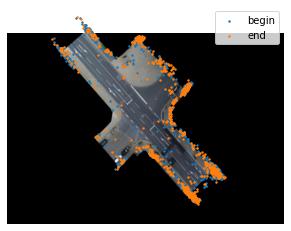

In [5]:
    fig1, ax1 = plt.subplots()
    d = {"x":0,"y":1}
    
    scene_data.plot_on_image([beginpoints, endpoints], 
    save_path='data/images/thesis_gens/inputs_outputs.png', ms = [2, 2], ax=ax1,
    col_num_dicts=[d,d], labels=["begin", "end"], hide_axes=True)

In [17]:
scene_data2 = HighLevelSceneLoader(p_img_bounds, p_dest_locs)
scene_data2.load_sdd(opentraj_root, "little", "video0")

ValueError: could not convert string to float: '.'

In [16]:
scene_data2.traj_dataframe.max()


index               99238
frame_id             9000
agent_id              124
pos_x             46.4419
pos_y             72.5888
label          pedestrian
lost                    1
occluded                1
generated               1
scene_id     gates-video2
timestamp             300
vel_x             2.57803
vel_y             2.99735
dtype: object

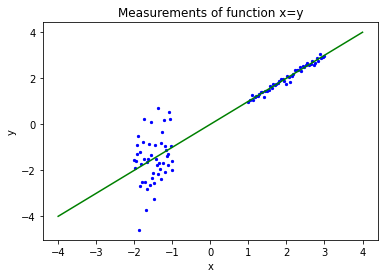

In [20]:
# Show epistemic vs aleatoric loss
# Let's do from -4 to 4, function x=y
first_observations_x = np.linspace(-2,-1) 
first_observations_y = first_observations_x + np.random.randn(50)
last_observations_x = np.linspace(1,3) 
last_observations_y = last_observations_x + np.random.randn(50)/10

the_function = np.array([[-4,-4], [4,4]])

fig_unc_comp, ax_unc_comp = plt.subplots()

ax_unc_comp.scatter(first_observations_x, first_observations_y, c="blue", s=5)
ax_unc_comp.scatter(last_observations_x, last_observations_y, c="blue", s=5)
ax_unc_comp.plot(the_function[:,0], the_function[:, 1], c="green")
ax_unc_comp.set_title("Measurements of function x=y")
ax_unc_comp.set_xlabel("x")
ax_unc_comp.set_ylabel("y")

fig_unc_comp.savefig('data/images/thesis_gens/uncertainty_kinds.png', bbox_inches='tight')